In [ ]:

# Load libraries
import missingno as msno 
import pickle
import pandas as pd
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

# Load Data
with open('/content/mn_final_output.pkl', 'rb') as f:
    output_1850 = pickle.load(f)
    
with open('/content/final_output.pkl', 'rb') as f:
    output_1880 = pickle.load(f)
    
with open('/content/bk_final_output.pkl', 'rb') as f:
    output_1850_bk = pickle.load(f)
    
# Replace empty strings with NaN values
output_1850.replace('', np.nan, inplace=True)
output_1880.replace('', np.nan, inplace=True)
output_1850_bk.replace('', np.nan, inplace=True)

1850 Manhattan

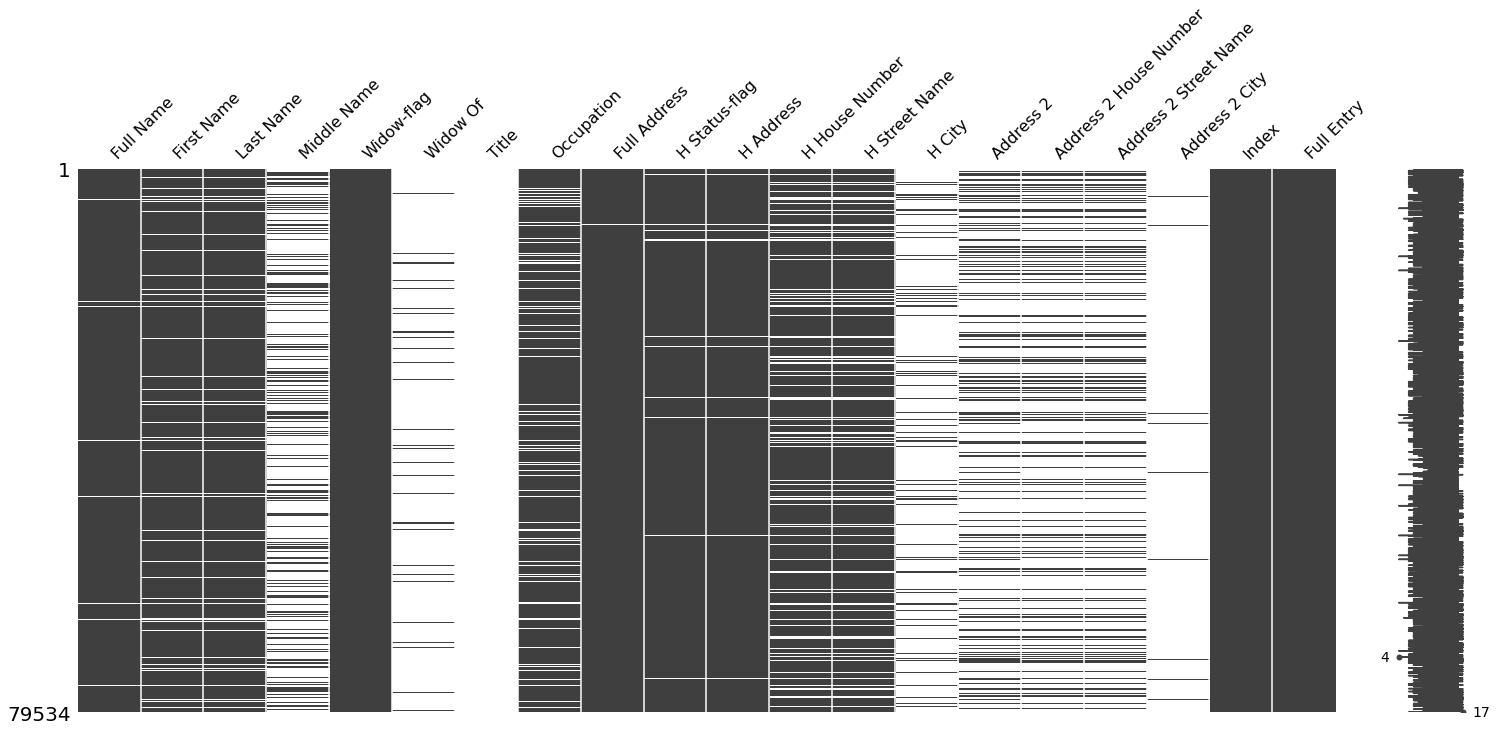

In [ ]:
# Visualize missing values as a matrix 
msno.matrix(output_1850)

Observations

Columns like Widow-flag, Index and Full Entry were hardcoded, so they should not have any missing values

Columns like Title are completely missing, so the scripts were unable to pick out the Title values

Data deprecation for First Name and Last Name

Middle Name, Widow Of and most of the secondary addresses not always filled in

more house addresses recognized as compared to previous script

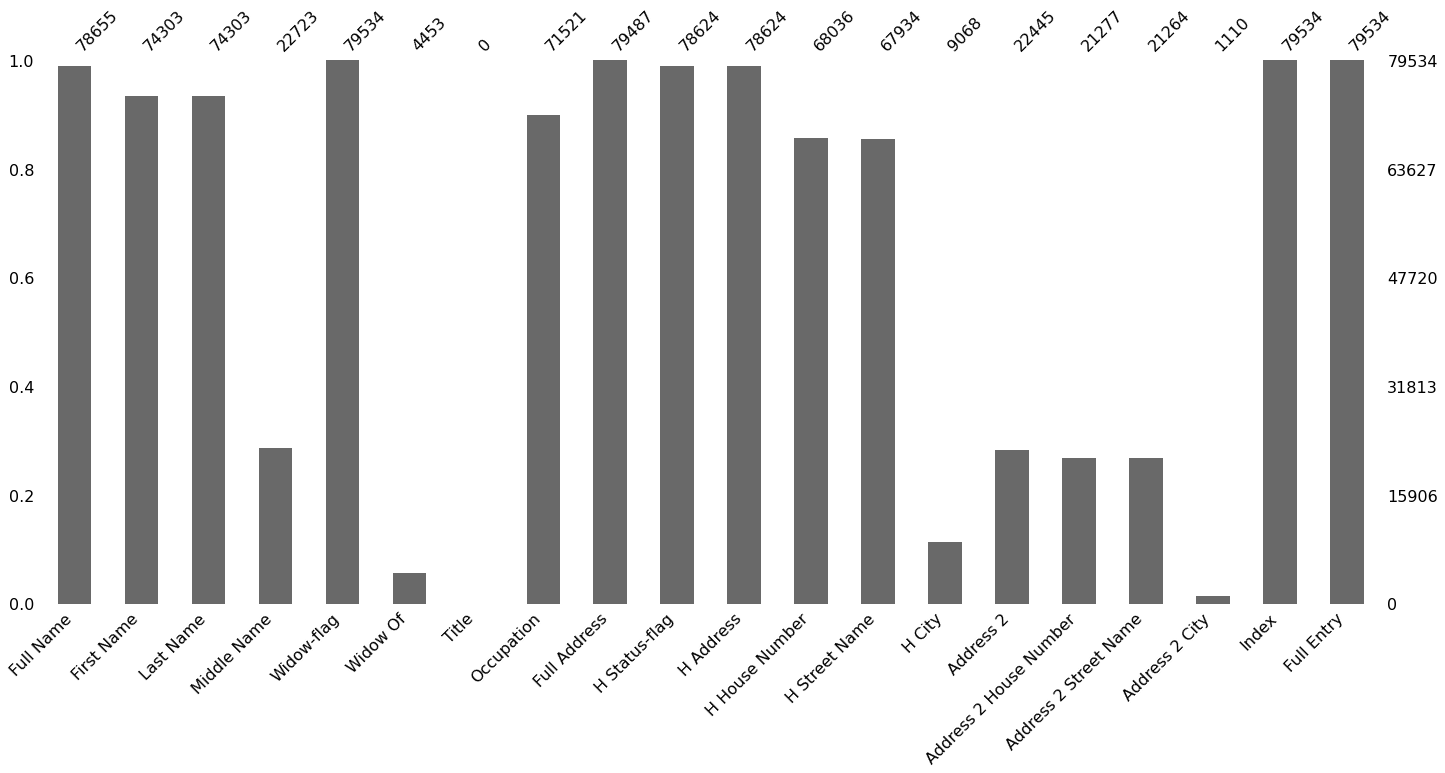

In [ ]:
# Visualize the number of missing values as a bar chart
msno.bar(output_1850)

In [ ]:
print(output_1850.isna().sum()) # Count missing values in each column

Full Name                   879
First Name                 5231
Last Name                  5231
Middle Name               56811
Widow-flag                    0
Widow Of                  75081
Title                     79534
Occupation                 8013
Full Address                 47
H Status-flag               910
H Address                   910
H House Number            11498
H Street Name             11600
H City                    70466
Address 2                 57089
Address 2 House Number    58257
Address 2 Street Name     58270
Address 2 City            78424
Index                         0
Full Entry                    0
dtype: int64


Correlation in "Missing-ness"

Missingness in Last Name and First Name is correlated

Also correlated to the Full Name column

Address columns are correlated to the H Address column

All of which were expected

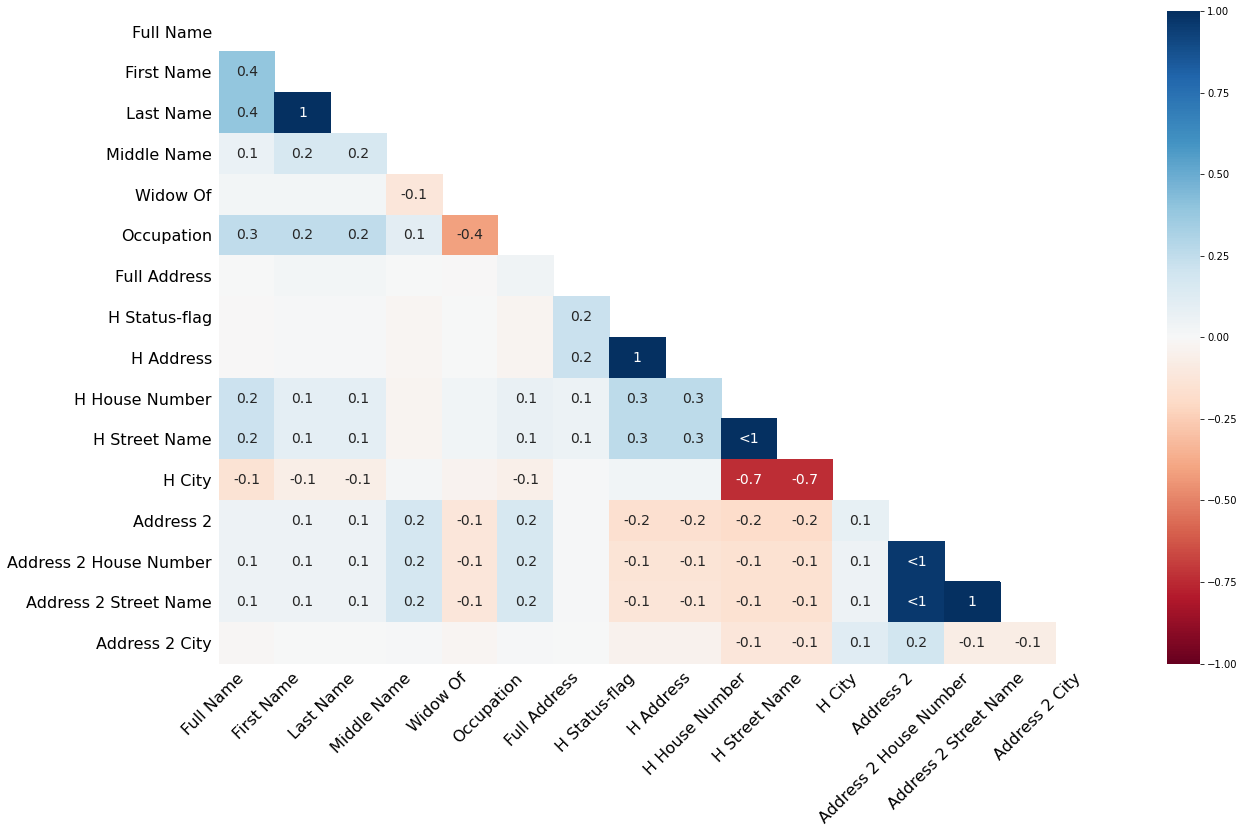

In [ ]:
# Correlation Matrix for Missing Data
msno.heatmap(output_1850)

Samples & Some Findings

There is a function in the 01 script that picks up Business records from Person records. This is done by taking Fully Capitalized text, i.e. isupper

However, from the sample below, we can observe instances where, an Abbott / Reverend / Religious leader might have been identified as a Business

This is likely because the entry was capitalized in the census directory

Also likely that there is a . (Rev.) following the capitalized text, which makes it difficult to get a split

Nevertheless, the problem is isolated because the string remains within the Occupation column that can be split subsequently

Poor Punctuation creates issues

In [ ]:
# Print out Sample of Missing Full Names
output_1850[output_1850['Full Name'].isna()].head(5)

,Full Name,First Name,Last Name,Middle Name,Widow-flag,Widow Of,Title,Occupation,Full Address,H Status-flag,H Address,H House Number,H Street Name,H City,Address 2,Address 2 House Number,Address 2 Street Name,Address 2 City,Index,Full Entry
4,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Albro Benjamin sen. 328 Bowery,Assume,Albro Benjamin sen. 328 Bowery,NaN,NaN,Albro Benjamin sen. 328 Bowery,NaN,NaN,NaN,NaN,4,Albro Benjamin sen. 328 Bowery
286,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,ABB,Assume,ABB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286,ABB
319,NaN,NaN,NaN,NaN,False,NaN,NaN,ABBOTT GORHAM D . (Rev.) Abbott’s collegiate i...,7 Union pl.,Assume,7 Union pl.,7,Union pl.,NaN,NaN,NaN,NaN,NaN,319,ABBOTT GORHAM D. (Rev.) Abbott’s collegiate in...
321,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Abbott Jacob (Rev.) 260 Greene,Assume,Abbott Jacob (Rev.) 260 Greene,NaN,NaN,Abbott Jacob (Rev.) 260 Greene,NaN,NaN,NaN,NaN,321,Abbott Jacob (Rev.) 260 Greene
322,NaN,NaN,NaN,NaN,False,NaN,NaN,ABBOTT JOHN S . C . (Rev.) institution for you...,"260 Greene, h. 43 Lafayette pl.",True,h. 43 Lafayette pl.,43,Lafayette pl.,NaN,260 Greene,260,Greene,NaN,322,ABBOTT JOHN S. C. (Rev.) institution for young...


In [ ]:
output_1850['Full Address'].head(5)

1                             47 Broadway, h. 39 Pearl
2    20 Washington & 13 West, h. 170 Clinton , Broo...
3                                       601 Washington
4                       Albro Benjamin sen. 328 Bowery
5                                            42 Orange
Name: Full Address, dtype: object

1880 Manhattan

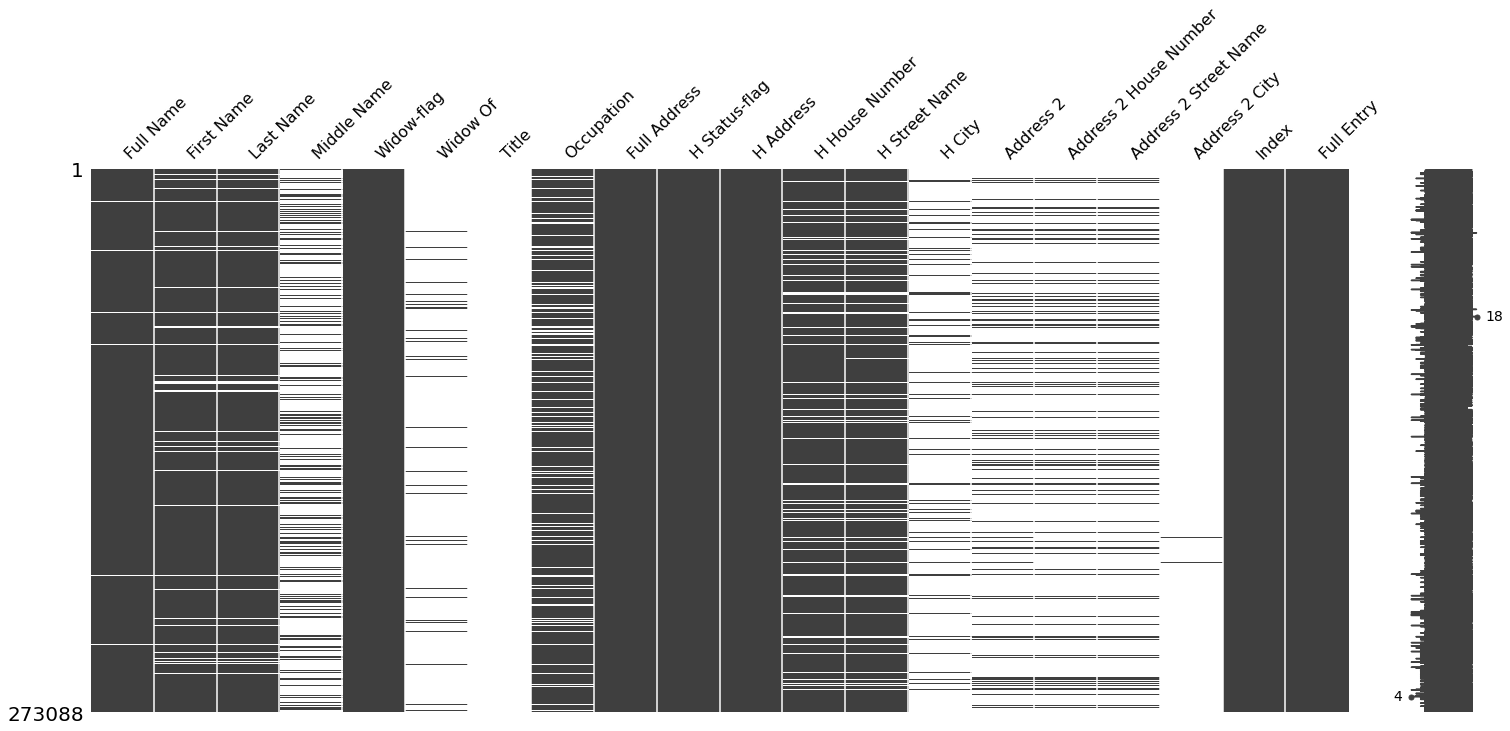

In [ ]:
# Visualize missing values as a matrix 
msno.matrix(output_1880)

Observations

Similar to 1850 but overall number of null values reduced

Columns like Widow-flag, Index and Full Entry were hardcoded, so they should not have any missing values

Columns like Title are completely missing, so the scripts were unable to pick out the Title values
Data deprecation for First Name and Last Name

Middle Name, Widow Of and most of the secondary addresses not always filled in

Improvement in identification of house addresses.

less occupations recognized as compared to 1850 mn file

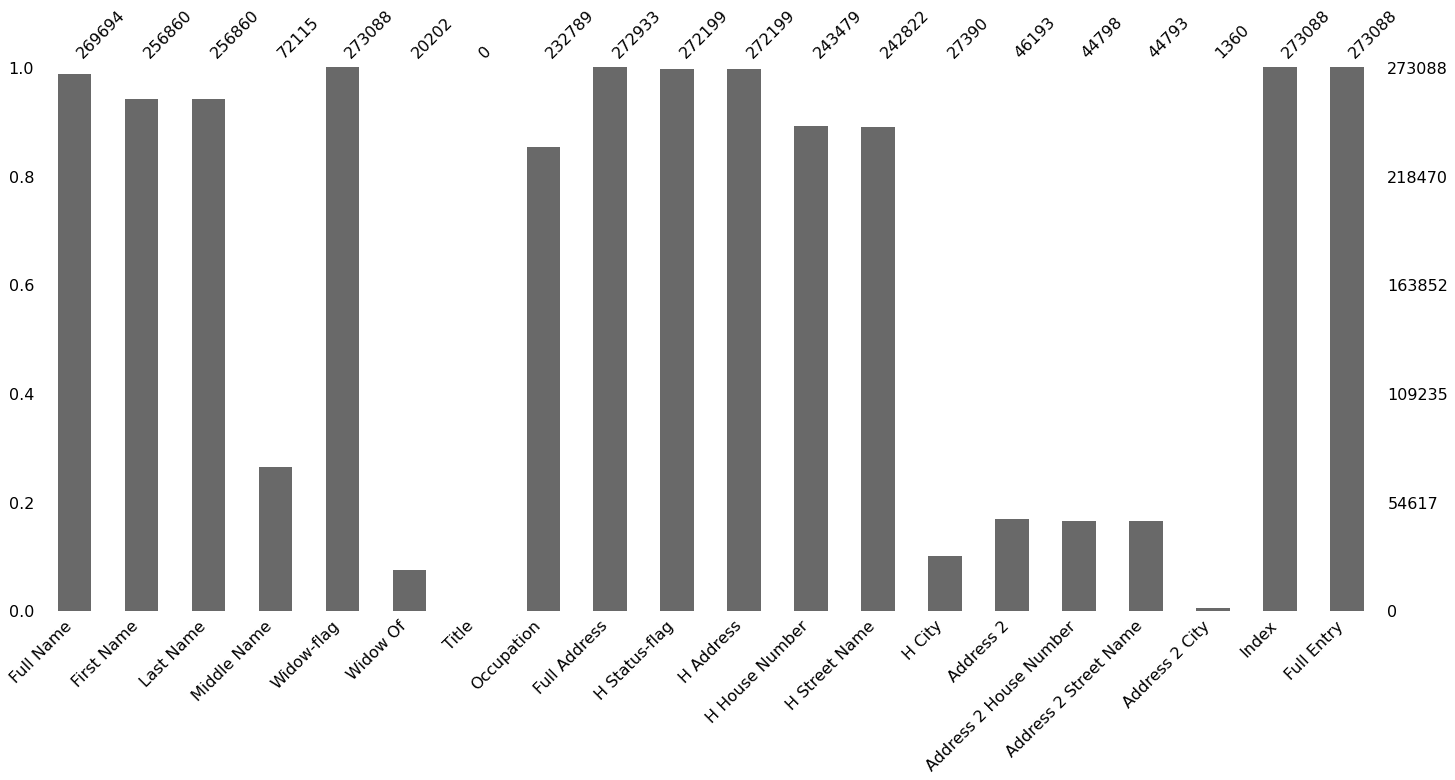

In [ ]:
# Visualize the number of missing values as a bar chart
msno.bar(output_1880)

In [ ]:
print(output_1880.isna().sum()) # Count missing values in each column

Full Name                   3394
First Name                 16228
Last Name                  16228
Middle Name               200973
Widow-flag                     0
Widow Of                  252886
Title                     273088
Occupation                 40299
Full Address                 155
H Status-flag                889
H Address                    889
H House Number             29609
H Street Name              30266
H City                    245698
Address 2                 226895
Address 2 House Number    228290
Address 2 Street Name     228295
Address 2 City            271728
Index                          0
Full Entry                     0
dtype: int64


Correlation in "Missing-ness"

Missingness in Last Name and First Name is correlated

Also correlated to the Full Name column

Address columns are correlated to the H Address column

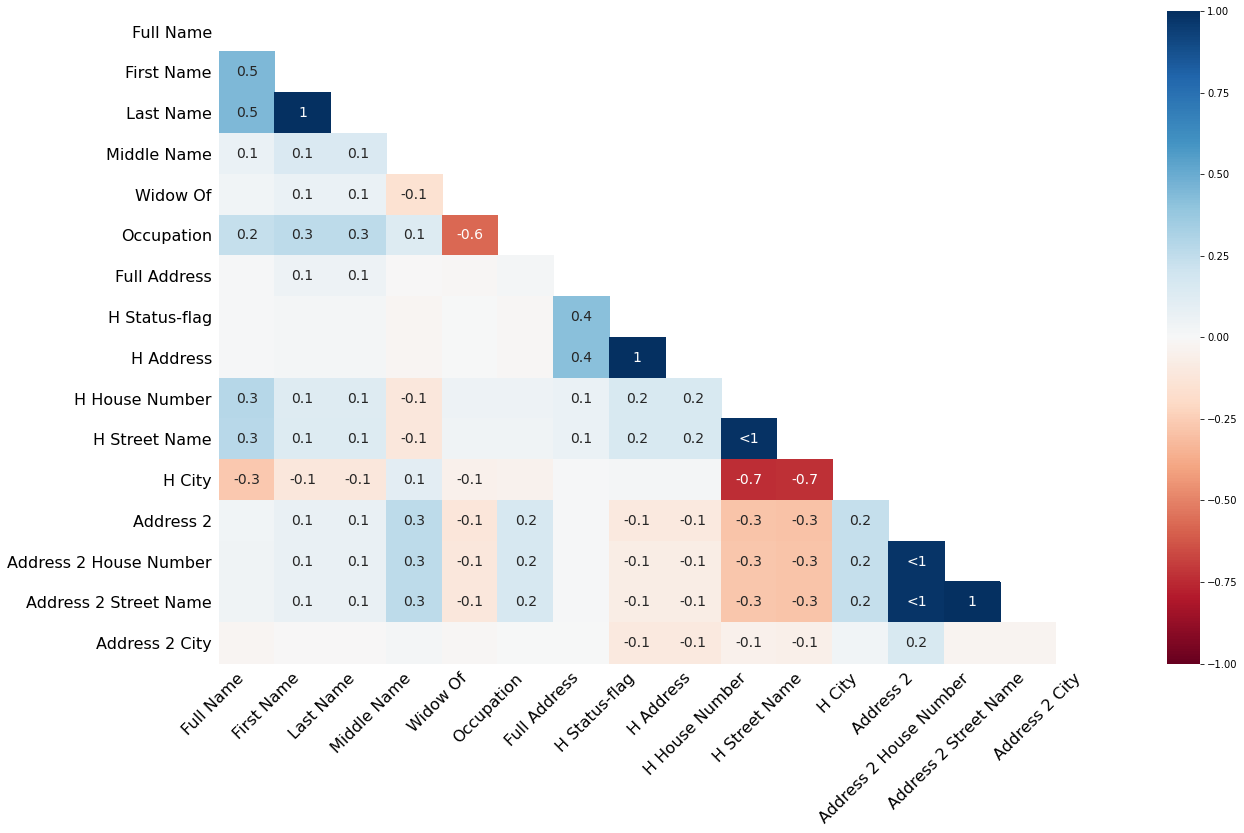

In [ ]:
# Correlation Matrix for Missing Data
msno.heatmap(output_1880)

Samples & Some Findings

There is a function in the 01 script that picks up Business records from Person records. This is done by taking Fully Capitalized text, i.e. isupper

However, from the sample below, we can observe instances where, an Abbott / Reverend / Religious leader might have been identified as a Business

This is likely because the entry was capitalized in the census directory

Also likely that there is a . (Rev.) following the capitalized text, which makes it difficult to get a split

Nevertheless, the problem is isolated because the string remains within the Occupation column that can be split subsequently

Abbreviations, e.g. ACK, ADA, ADR are not present like in the 1850 dataset

Poor Punctuation creates issues

Businesses with no Addresses


In [ ]:
# Print out Sample of Missing Full Names
output_1880[output_1880['Full Name'].isna()].head(5)

,Full Name,First Name,Last Name,Middle Name,Widow-flag,Widow Of,Title,Occupation,Full Address,H Status-flag,H Address,H House Number,H Street Name,H City,Address 2,Address 2 House Number,Address 2 Street Name,Address 2 City,Index,Full Entry
787,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,"TRAMARINE WORKS,—A. BERINGER'S PULP COLORS,—fo...",Assume,"TRAMARINE WORKS,—A. BERINGER'S PULP COLORS,—fo...",NaN,NaN,"TRAMARINE WORKS,—A. BERINGER'S PULP COLORS,—fo...",NaN,NaN,NaN,NaN,787,"TRAMARINE WORKS,—A. BERINGER'S PULP COLORS,—fo..."
1008,NaN,NaN,NaN,NaN,False,NaN,NaN,Zabriskie Francis N . (Rev.) editor,"6 New Church,h N. J.",True,h N. J.,NaN,NaN,N. J.,6 New Church,6,New Church,NaN,1008,Zabriskie Francis N. (Rev.) editor. 6 New Chur...
1039,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,"Zachgow August,turner,371 W. 48th,h 530 W.47th",True,h 530 W.47th,530,W.47th,NaN,"Zachgow August,turner,371 W. 48th",NaN,NaN,"Zachgow August,turner,371 W. 48th",1039,"Zachgow August,turner,371 W. 48th, h 530 W.47th"
1173,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Young Men's Christian Assn. 52 E. 23d & 134 Bo...,Assume,Young Men's Christian Assn. 52 E. 23d & 134 Bo...,NaN,NaN,Young Men's Christian Assn. 52 E. 23d & 134 Bo...,NaN,NaN,NaN,NaN,1173,Young Men's Christian Assn. 52 E. 23d & 134 Bo...
1174,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,Young Men’s Christian Assn. (Central) 201 E. 86th,Assume,Young Men’s Christian Assn. (Central) 201 E. 86th,NaN,NaN,Young Men’s Christian Assn. (Central) 201 E. 86th,NaN,NaN,NaN,NaN,1174,Young Men’s Christian Assn. (Central) 201 E. 86th


In [ ]:
output_1880.head(3)


,Full Name,First Name,Last Name,Middle Name,Widow-flag,Widow Of,Title,Occupation,Full Address,H Status-flag,H Address,H House Number,H Street Name,H City,Address 2,Address 2 House Number,Address 2 Street Name,Address 2 City,Index,Full Entry
1,Zoller Ignatz,Ignatz,Zoller,NaN,False,NaN,NaN,shoes,106 W. 24th,Assume,106 W. 24th,106,W. 24th,NaN,NaN,NaN,NaN,NaN,1,"Zoller Ignatz, shoes, 106 W. 24th"
2,Zoller John,John,Zoller,NaN,False,NaN,NaN,tailor,221 Ninth av.,Assume,221 Ninth av.,221,Ninth av.,NaN,NaN,NaN,NaN,NaN,2,"Zoller John, tailor. 221 Ninth av."
3,Zoller Robert W,Robert,Zoller,W,False,NaN,NaN,birds,5 N. William,Assume,5 N. William,5,N. William,NaN,NaN,NaN,NaN,NaN,3,"Zoller Robert W. birds, 5 N. William"


1850 Brooklyn

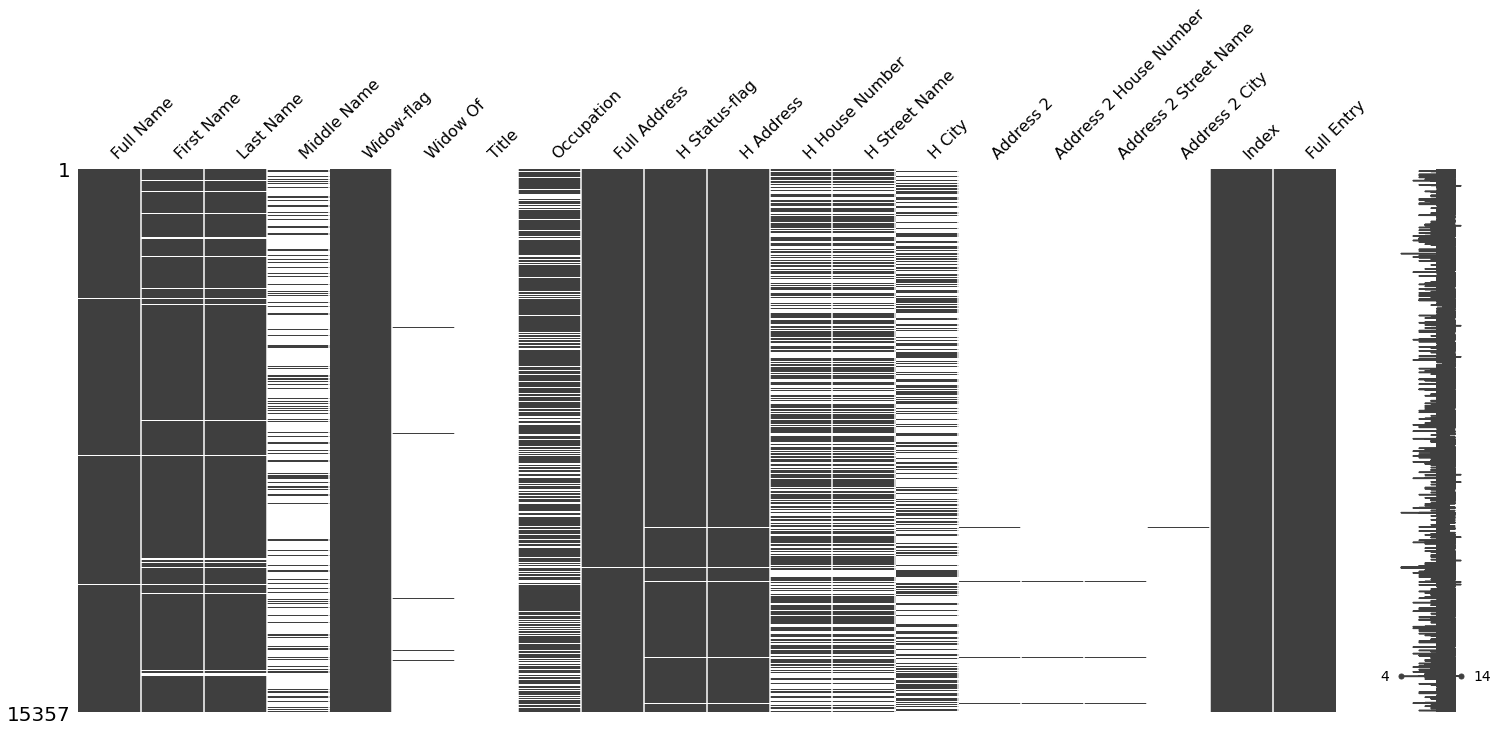

In [ ]:
# Visualize missing values as a matrix 
msno.matrix(output_1850_bk)

In [ ]:
print(output_1850_bk.isna().sum()) # Count missing values in each column

Full Name                   128
First Name                  563
Last Name                   563
Middle Name               11451
Widow-flag                    0
Widow Of                  15164
Title                     15357
Occupation                 3358
Full Address                 27
H Status-flag               152
H Address                   152
H House Number             6827
H Street Name              6828
H City                     8738
Address 2                 15232
Address 2 House Number    15282
Address 2 Street Name     15282
Address 2 City            15307
Index                         0
Full Entry                    0
dtype: int64


In [ ]:
output_1850_bk.head(5)

,Full Name,First Name,Last Name,Middle Name,Widow-flag,Widow Of,Title,Occupation,Full Address,H Status-flag,H Address,H House Number,H Street Name,H City,Address 2,Address 2 House Number,Address 2 Street Name,Address 2 City,Index,Full Entry
1,Abberly Richard,Richard,Abberly,NaN,False,NaN,NaN,shoemaker,168 Hudson av,Assume,168 Hudson av,168,Hudson av,NaN,NaN,NaN,NaN,NaN,1,"Abberly Richard, shoemaker, 168 Hudson av"
2,Abberly Samuel,Samuel,Abberly,NaN,False,NaN,NaN,mason,Dean n Vanderbilt av,Assume,Dean n Vanderbilt av,NaN,NaN,Dean n Vanderbilt av,NaN,NaN,NaN,NaN,2,"Abberly Samuel, mason, Dean n Vanderbilt av"
3,Abbey A C,A,Abbey,C,False,NaN,NaN,carpenter,82 Poplar,Assume,82 Poplar,82,Poplar,NaN,NaN,NaN,NaN,NaN,3,"Abbey A C, carpenter, 82 Poplar"
4,ABBES HORATIO G,HORATIO,ABBES,G,False,NaN,NaN,NaN,Columbia Institute for the education of boys 75 Columbia,Assume,Columbia Institute for the education of boys 75 Columbia,NaN,NaN,Columbia Institute for the education of boys 75 Columbia,NaN,NaN,NaN,NaN,4,"ABBES HORATIO G, Columbia Institute for the education of boys 75 Columbia"
5,Abbey W S,W,Abbey,S,False,NaN,NaN,merchant,NYh Union n Court,Assume,NYh Union n Court,NaN,NaN,NYh Union n Court,NaN,NaN,NaN,NaN,5,"Abbey W S, merchant, NYh Union n Court"


Occupation Types

The variation in occupation type decreased from 1850 to 1880

15,543 unique occupation types reduced to 7,074

The top occupations by percentage remained quite similar over 3 decades

E.g. Carman - assume as driver, laborer, carpenter, lawyer, tailor

In [ ]:
output_1850_bk['Occupation'].value_counts(normalize = True).head(10)

laborer      0.128594
carpenter    0.051588
merchant     0.042337
grocer       0.038503
clerk        0.025919
mason        0.024835
shoemaker    0.023919
tailor       0.021335
carman       0.017835
painter      0.015335
Name: Occupation, dtype: float64

In [ ]:
output_1850['Occupation'].value_counts(normalize = True).head(10)

grocer       0.036479
carman       0.035388
tailor       0.029628
laborer      0.028495
carpenter    0.027936
clerk        0.019938
shoemaker    0.019882
lawyer       0.015142
mer          0.015142
drygoods     0.012821
Name: Occupation, dtype: float64

In [ ]:
output_1880['Occupation'].value_counts(normalize = True).head(10)

laborer      0.065982
clerk        0.060806
tailor       0.036166
driver       0.029357
carpenter    0.025804
grocer       0.019374
lawyer       0.017892
painter      0.015860
liquors      0.015366
beer         0.014876
Name: Occupation, dtype: float64

In [ ]:
output_1880['clean_occupation'] = output_1880['Occupation'].astype('str') 
output_1850['clean_occupation'] = output_1850['Occupation'].astype('str') 
output_1850_bk['clean_occupation'] = output_1850_bk['Occupation'].astype('str')